<a href="https://colab.research.google.com/github/johnitodo/Cardio-GoodFitness/blob/main/CreditCard_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing our base libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer



In [ ]:
#importing our data uploader into our environment
from google.colab import files
uploaded = files.upload()

Saving Credit+Card+Customer+Data.xlsx to Credit+Card+Customer+Data.xlsx


In [ ]:
#reading in our dataset
df = pd.read_excel('Credit+Card+Customer+Data.xlsx')

## **Data Exploration**

In [ ]:
#fetching the numbers of rows and columns
df.shape


(660, 7)

In [ ]:
#Checking for null values
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
#Checking for row duplicates
df.duplicated().sum()

0

In [ ]:
#viewing data samples
df.sample(7)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
518,519,99131,36000,7,4,0,2
534,535,39644,56000,6,4,0,3
265,266,17036,9000,7,4,2,1
489,490,42921,50000,7,5,2,1
654,655,65750,172000,10,1,9,1
549,550,90999,39000,7,5,2,3
199,200,16715,7000,4,2,4,9


After looking at the columns, I realised that SI_no and Customer key will not necesarily add any value to our model because they are just identifiers used to recognise a customer. Those 2 columns will be dropped. To do that we will create a copy of the dataframe where we will perform the dropping.

In [ ]:
#Making a copy of the dataframe
data = df.copy()

In [ ]:
#dropping the SI_No and Customer key columns from our dataframe
data.drop(['Sl_No','Customer Key'],axis = 1, inplace = True)

In [ ]:
#Descriptive data analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


from the analysis, we can see that some of our columns are skewed, when you consider the difference between the 50th percentile and the mean. we will have a better perspective after we visualise our data. 

# **Data Visualisation**

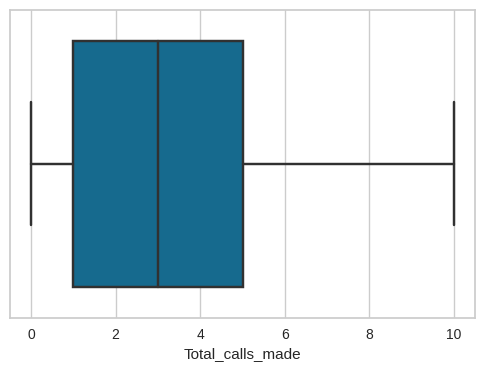

In [ ]:

plt.figure(figsize = (6, 4))

sns.boxplot(data, x='Total_calls_made');

We can see that this column is skewed to the right. We can see that the population in the dataset made and average of 3 calls and with few people making upto 10 calls.

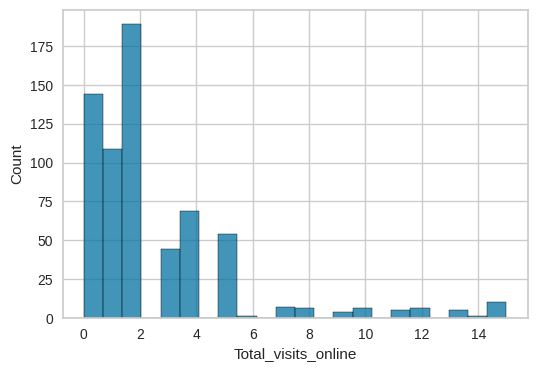

In [ ]:
plt.figure(figsize = (6, 4))

sns.histplot(data, x='Total_visits_online');

from the above data, we can se that the column is also skewed  to the right handside. We have less of our population using the online channel to visit or interact with the company.

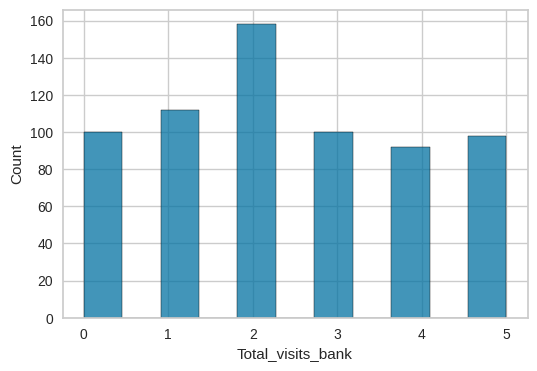

In [ ]:
plt.figure(figsize = (6, 4))

sns.histplot(data, x='Total_visits_bank');

We can see from the above column that our visits to the bank column is nearly perfectly skewed, we have an average of 2 customers who usually visit the bank office 

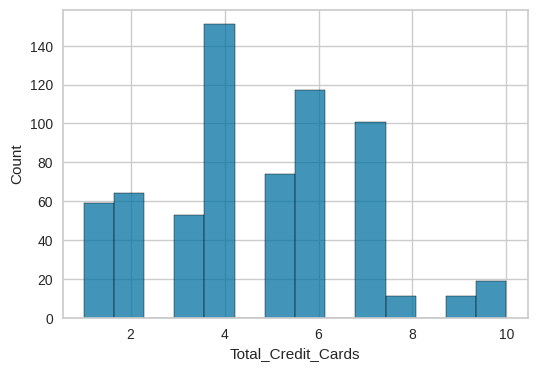

In [ ]:
plt.figure(figsize = (6, 4))

sns.histplot(data, x='Total_Credit_Cards');

We can see from the above column that the total population had a credit card was 5, also the column seems to be perfectly distributed.


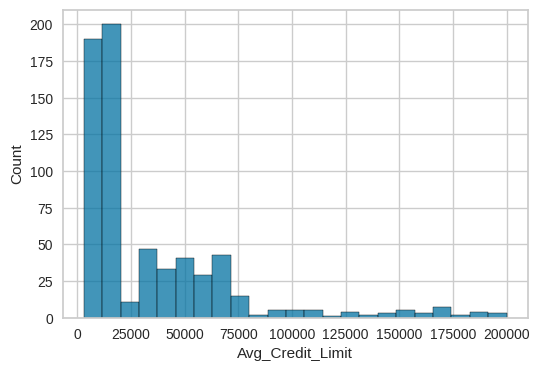

In [ ]:
plt.figure(figsize = (6, 4))

sns.histplot(data, x='Avg_Credit_Limit');

We can see from the above diagram the column is rightly skewed, with the larger population securing a loan of less than 25000 

<Axes: >

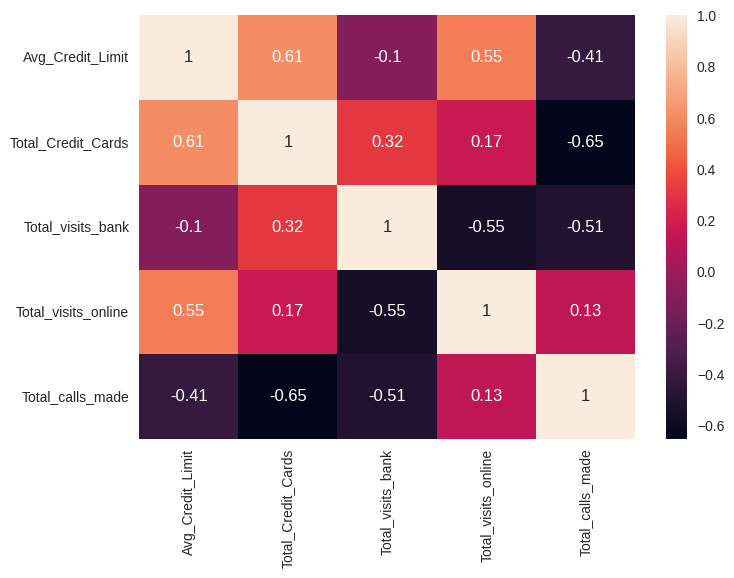

In [ ]:
cor = data.corr()

sns.heatmap(cor, annot = True)

From the corrolation heatmap we can see the various degrees of corroletion between our features. we have a high positive correlation between both total_credit_cards and avg_credit_limit, we can also see a high negative correlation between total_bank_visits between both total_visits_online and total_calls_made.

### **Model Building**

In [ ]:
#Scaling our data, since cluster models are distant between point dependent
scaler = StandardScaler()
sc_data = scaler.fit_transform(data)

### **#Using Kmeans**

In [ ]:
#Instantiating the Kmeans Model
kmeans = KMeans()


Number of Clusters: 1 	Average Distortion: 2.006922226250361
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0690478232188085
Number of Clusters: 5 	Average Distortion: 0.9906725738045986
Number of Clusters: 6 	Average Distortion: 0.951641599433233
Number of Clusters: 7 	Average Distortion: 0.9322248037596301
Number of Clusters: 8 	Average Distortion: 0.889122747129854


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

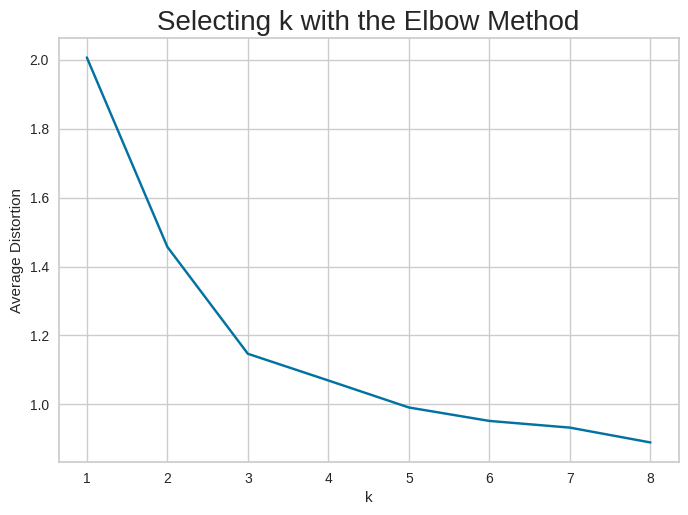

In [ ]:
#looping through the model to get the best number of clusters for model building
clusters = range(1, 9)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k, n_init = 'auto')  # Initialize KMeans
    model.fit(sc_data)  # Fit kMeans on the data
    prediction = model.predict(sc_data)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(sc_data, model.cluster_centers_, "euclidean"), axis=1))
        / sc_data.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot


As we can see above, the curve begins to drop as we increase the number of clusters, with 1 giving the highest performance(but we know that 1 can not make a cluster, we ignore it), we see between 2 and 3 gives us the best level of distortion and the remaining points are averagely the same. That is not all, we will also confirm this clusters by running it through the model to see which gives us the best silhoutte score. We can do this by running a loop. We will go with the best parameters.


For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2719836354786957
For n_clusters = 6, silhouette score is 0.3210158827535338
For n_clusters = 7, silhouette score is 0.25373696686299047
For n_clusters = 8, silhouette score is 0.22045611553728464
For n_clusters = 9, silhouette score is 0.22221537931096802


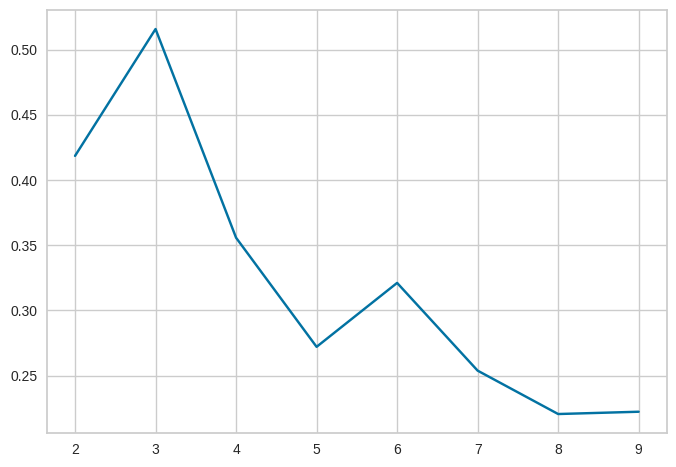

In [ ]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 10))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, n_init = 'auto')  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((sc_data))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(sc_data, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score);

We can see from the curve that we get the highest silhoutte score when we use 3 number of clusters. We will go with this and use 3 clusters in building our model.

In [ ]:
#Rebuilding our model with the best number of clusters
kmeans1 = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans1.fit(sc_data)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [ ]:
# adding kmeans cluster labels to the original dataframe
data["Kmeans_clusters"] = kmeans1.labels_
df["Kmeans_clusters"] = kmeans1.labels_

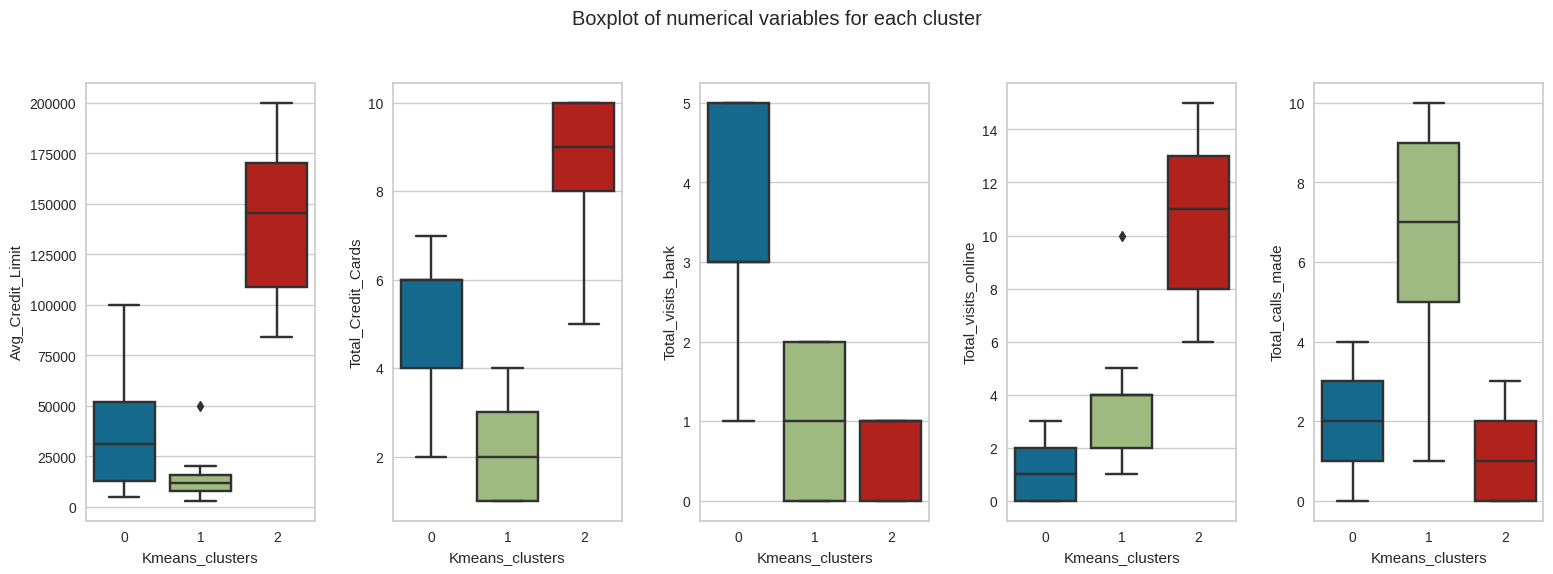

In [ ]:
#Visualising our clusters.
num_col = data.columns.tolist()
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y= data[num_col[counter]], x= data["Kmeans_clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### **Cluster Explained**


We see from the chat that;

**Group 1 (Blue):** They generally have an averagely sized credit limit of up to 100k, also had a fairly large number of credit cards in their possession, we observe that they visit the bank more than the other groups, used the online channel for interacting with the bank alot less, compared to the other groups and made less calls to the bank.

**Group 2 (Green):** They generally have the least credit limit of up to 50k, also had the least number of credit cards in their possession compared to the other groups, we also observe that they visit the bank an average of twice compared to other groups. Also, they used the online channel for interacting with the banks an average of 5 times and made more calls to the bank compared to other groups.

**Group 3 (Red):** They generally have the highest credit limit of up to 200k, also had the highest number of credit cards in their possession compared to the other groups, we also observe that they visit the bank an average of between 1 and 0 compared to other groups. Also, they used the online channel for interacting with the banks alot more compared to other groups and made the least calls to the bank compared to other groups.

### **Using DBScan**

In [ ]:
#Instantiate DBscan
dbscan = DBSCAN()

#Fit and predict the model
labels = dbscan.fit_predict(sc_data)

In [ ]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23])

We get too much clusters, when we use the default hyper parameters which is likely not to perform optimally. So we are going to tune the hyper parameters to get the optimal number of clusters


In [ ]:
#Iterator tool
import itertools

In [ ]:
#hyper parameter tunning and checking the best silhoutte score
eps = np.linspace(0.1, 1, 10) #proposed number of eps
minPts = np.arange(2, 10) #proposed number of minPts

#Creating a tuple of eps and minPts
hyp_param = list(itertools.product(eps, minPts))

# Running a loop to try out all our hyperparameter values
for (eps, minPts) in hyp_param:
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    labels = dbscan.fit_predict(sc_data)
        
    num_unique_labels = len(np.unique(labels))
    if num_unique_labels > 1:
      score = silhouette_score(sc_data, labels)
      print(f'eps: {eps}; minPts: {minPts}; labels: {num_unique_labels}; silhouette score: {score}')
    else:
      print(f'eps: {eps}; minPts: {minPts}; labels: {num_unique_labels}; Skipping silhouette score calculation')

eps: 0.1; minPts: 2; labels: 59; silhouette score: -0.3792847005046285
eps: 0.1; minPts: 3; labels: 6; silhouette score: -0.4538623399170749
eps: 0.1; minPts: 4; labels: 3; silhouette score: -0.21755863126572988
eps: 0.1; minPts: 5; labels: 1; Skipping silhouette score calculation
eps: 0.1; minPts: 6; labels: 1; Skipping silhouette score calculation
eps: 0.1; minPts: 7; labels: 1; Skipping silhouette score calculation
eps: 0.1; minPts: 8; labels: 1; Skipping silhouette score calculation
eps: 0.1; minPts: 9; labels: 1; Skipping silhouette score calculation
eps: 0.2; minPts: 2; labels: 89; silhouette score: -0.24134194807651826
eps: 0.2; minPts: 3; labels: 20; silhouette score: -0.47374460800956625
eps: 0.2; minPts: 4; labels: 7; silhouette score: -0.39937304928535683
eps: 0.2; minPts: 5; labels: 1; Skipping silhouette score calculation
eps: 0.2; minPts: 6; labels: 1; Skipping silhouette score calculation
eps: 0.2; minPts: 7; labels: 1; Skipping silhouette score calculation
eps: 0.2; min

We can see that from our results we got the best silhoutte score for an above 1 cluster to be 0.52% and this is seen when we use an eps of 1.0, minPts of 3 and labels of 3. This is our best hyper parameters and as such we will rebuild our model with it.

In [ ]:
#Instantiate DBscan
dbscan1 = DBSCAN(eps=1.0, min_samples= 3)

#Fit and predict the model
db_labels = dbscan1.fit_predict(sc_data)

In [ ]:
#Checking our unique clusters
np.unique(db_labels)

array([-1,  0,  1])

In [ ]:
#Adding the labels into the dataframe
data["db_labels"] = db_labels
df["db_labels"] = db_labels

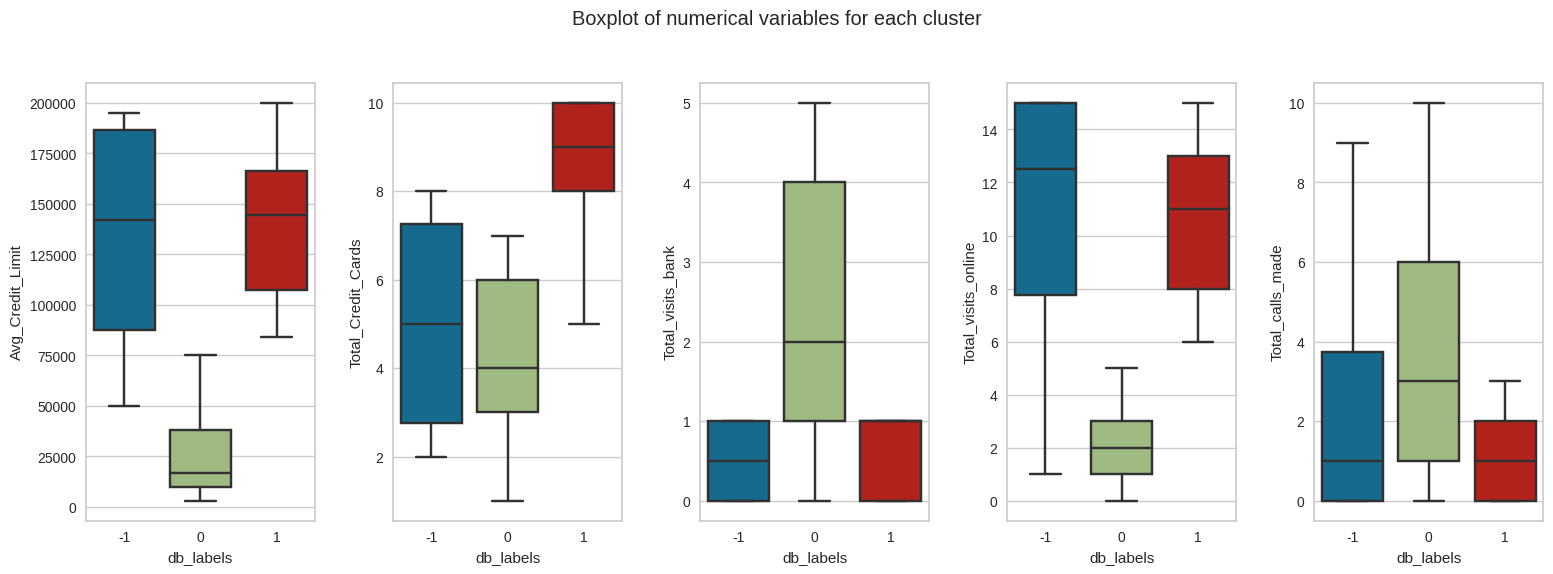

In [ ]:
#Visualising our clusters
num_col = data.columns.tolist()
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y= data[num_col[counter]], x= data["db_labels"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### **Cluster Explained**



We see from the chat that;

**Group -1 (Blue):** This are our noisy clusters or outliers.

**Group 0 (Green):** They generally have the least credit limit of up to 75k, also had the least number of credit cards in their possession compared to the other group, we also observe that they visit the bank an average of 5 times compared to other groups. Also, they used the online channel for interacting with the banks alot less compared to the other group and made more calls to the bank compared to other group.

**Group 1 (Red):** They generally have the highest credit limit of up to 200k, also had the highest number of credit cards in their possession compared to the other group, we also observe that they visit the bank an average of between 1 and 0 compared to other groups. Also, they used the online channel for interacting with the banks alot more compared to other group and made the least calls to the bank compared to other group.


### **KMeans and DBScan Compared**

We can see that most of the score gotten on our Kmeans cluster was largely affected by the noise of which we got a low silhoutte score. But our DBScan gave us a higher score and also grouped our cluster perfectly. But generally they both told the same story with data only that DBScan told it alot clearer.

## **Recommendation**

From the evidence gathered, we saw that:

1. The groups who had a higher credit score, had a more credit cards and generally enjoyed using the online channel to interact with the bank.
2. The groups with less credit scores, had fewer numbers of credit cards but interacted with the bank more either by phsical visit or by telephone.

**The Marketing Team Should:**

1. Create more contents to encourage people to increase their credit scores and also creatively device incentives for people who are actively tryng to increase their their there credit score.
2. The Marketing team should target new customers who have higher credit scores with incentives or improved products, so as to encourage them to switch over to the company.


**The Support Service Team Should:**
1. Optimise their online service to appeal to all their customers, this will reduce their foot traffic into the physical building.
2. Where feasible personalised online customer account officers or even their current account officer should be accessible online.